In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
303,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25
304,2020-12-25T17:00:00,8,Emilia-Romagna,2711,206,2917,56063,58980,1681,2127,...,65.0,10861.0,4546.0,1683.0,7.06,4.95,19.58,46.79,2.49,2.93
305,2020-12-26T17:00:00,8,Emilia-Romagna,2630,214,2844,54443,57287,-1693,1756,...,24.0,5775.0,3587.0,-1620.0,7.52,4.96,30.41,48.95,3.88,-2.87


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1283
Nuovi tamponi: 6066.0
Percentuale nuovi positivi/nuovi tamponi: 21.0 %
Nuovi guariti: 326.0
Nuovi deceduti: 69.0
Variazione positivi ricoverati con sintomi: -21.0
Variazione positivi in terapia intensiva: -4.0
Variazione positivi in isolamento dimiciliare: 913.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-28T17:00:00,8,Emilia-Romagna,999,119,1118,17112,18230,1150,1212,...,14.0,21376.0,8739.0,1069.0,10.64,6.13,5.67,13.87,15.53,6.73
1,2020-10-29T17:00:00,8,Emilia-Romagna,1054,123,1177,18536,19713,1483,1545,...,8.0,21860.0,8476.0,1424.0,10.45,5.97,7.07,18.23,3.36,8.13
2,2020-10-30T17:00:00,8,Emilia-Romagna,1157,119,1276,20145,21421,1708,1763,...,11.0,17577.0,6653.0,1609.0,9.33,5.96,10.03,26.50,-3.25,8.66
3,2020-10-31T17:00:00,8,Emilia-Romagna,1223,125,1348,21865,23213,1792,2046,...,19.0,18943.0,6852.0,1720.0,9.27,5.81,10.80,29.86,5.04,8.37
4,2020-11-01T17:00:00,8,Emilia-Romagna,1267,132,1399,23518,24917,1704,1758,...,16.0,12039.0,9050.0,1653.0,9.44,5.61,14.60,19.43,5.60,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
57,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25
58,2020-12-25T17:00:00,8,Emilia-Romagna,2711,206,2917,56063,58980,1681,2127,...,65.0,10861.0,4546.0,1683.0,7.06,4.95,19.58,46.79,2.49,2.93
59,2020-12-26T17:00:00,8,Emilia-Romagna,2630,214,2844,54443,57287,-1693,1756,...,24.0,5775.0,3587.0,-1620.0,7.52,4.96,30.41,48.95,3.88,-2.87


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

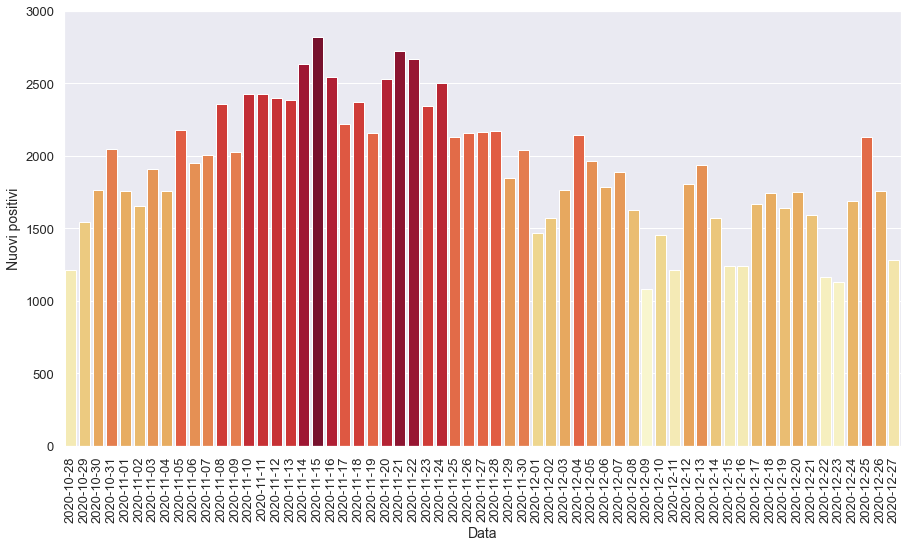

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

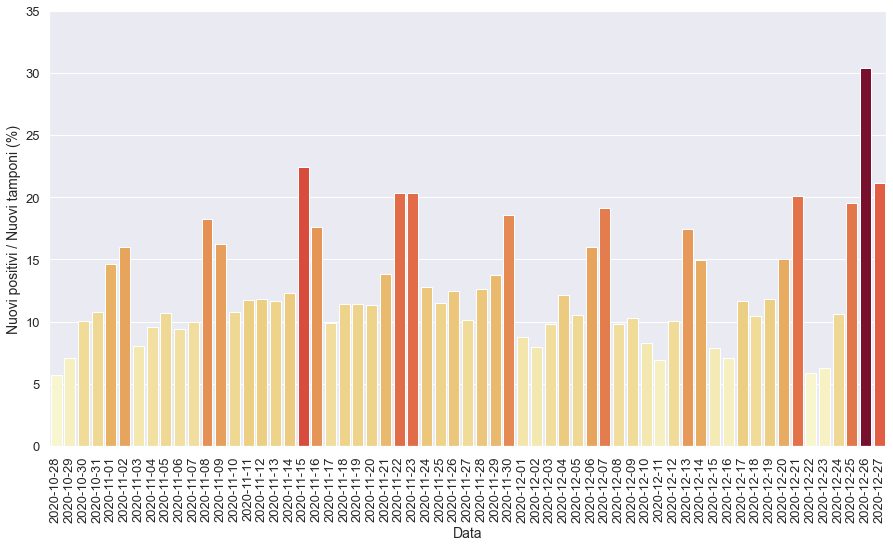

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

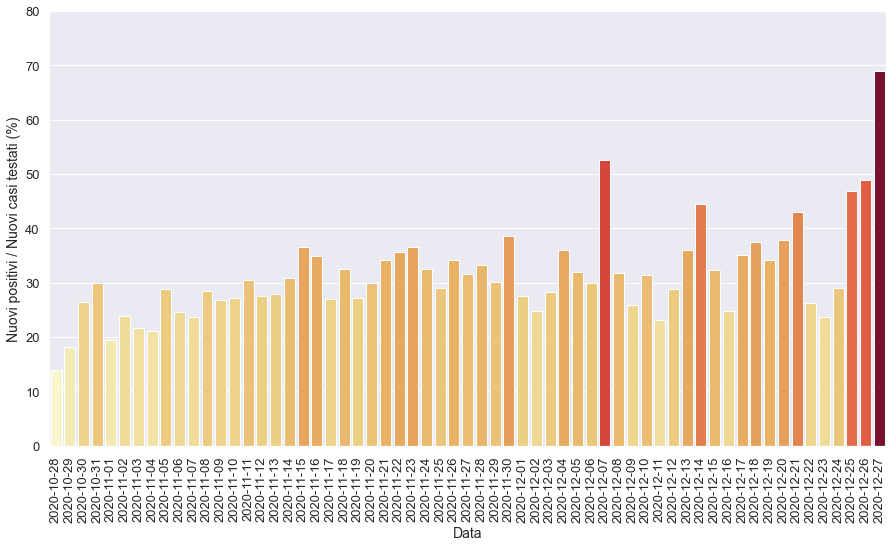

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

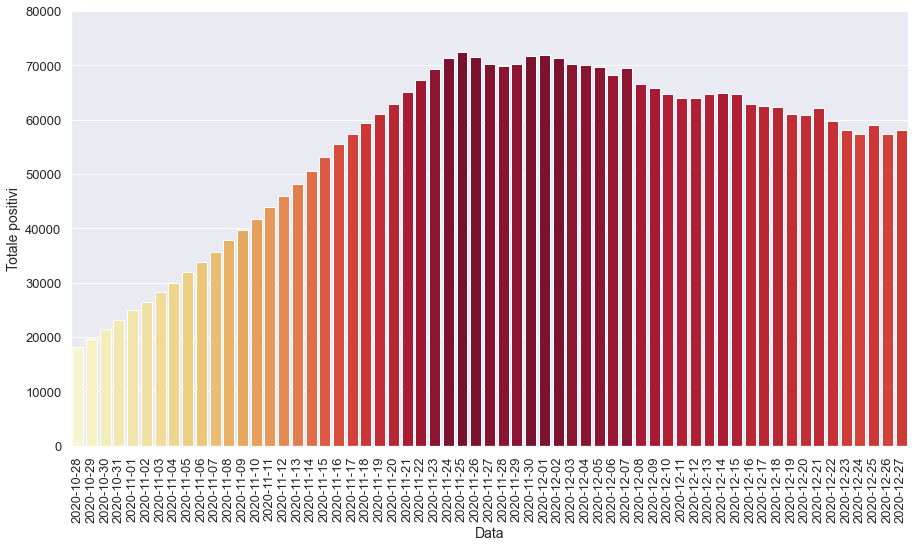

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

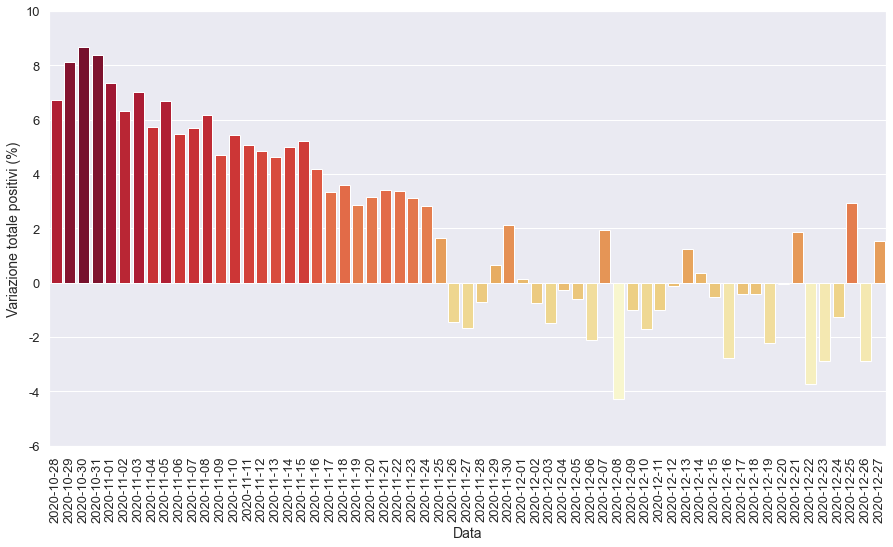

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

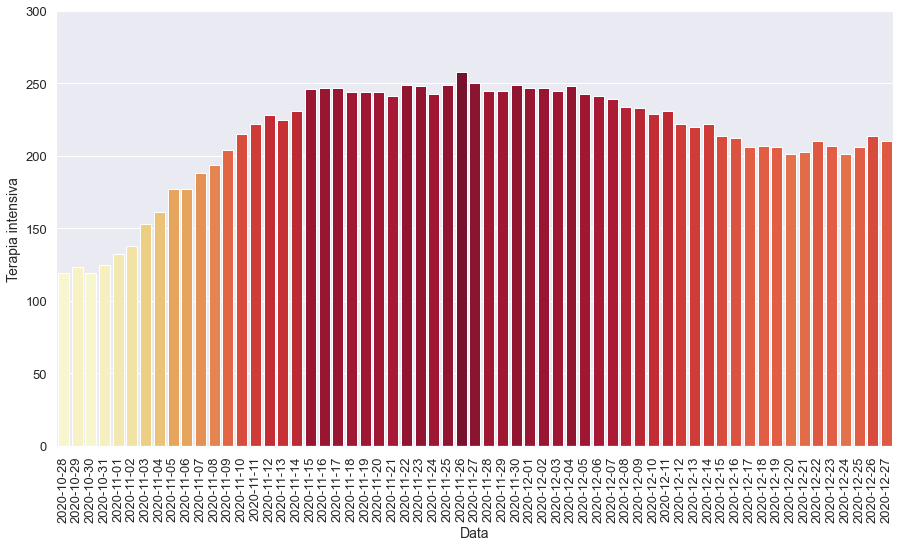

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

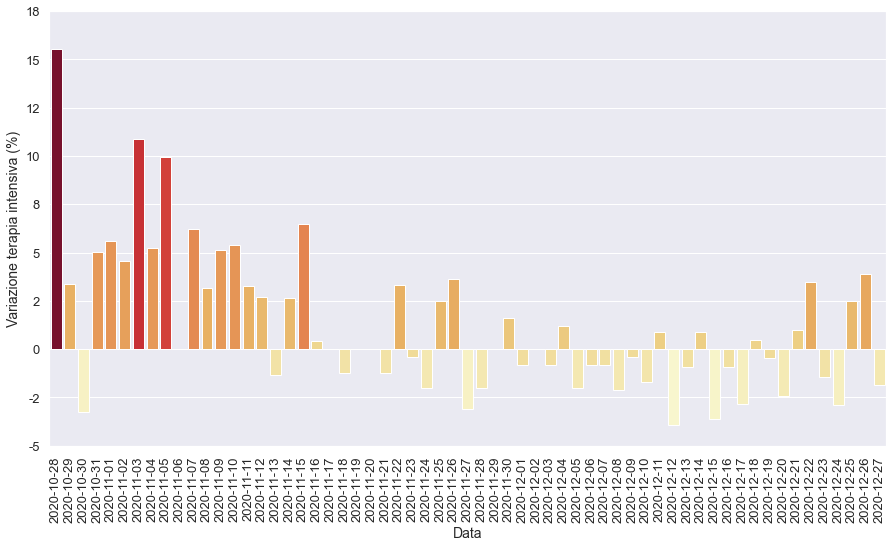

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

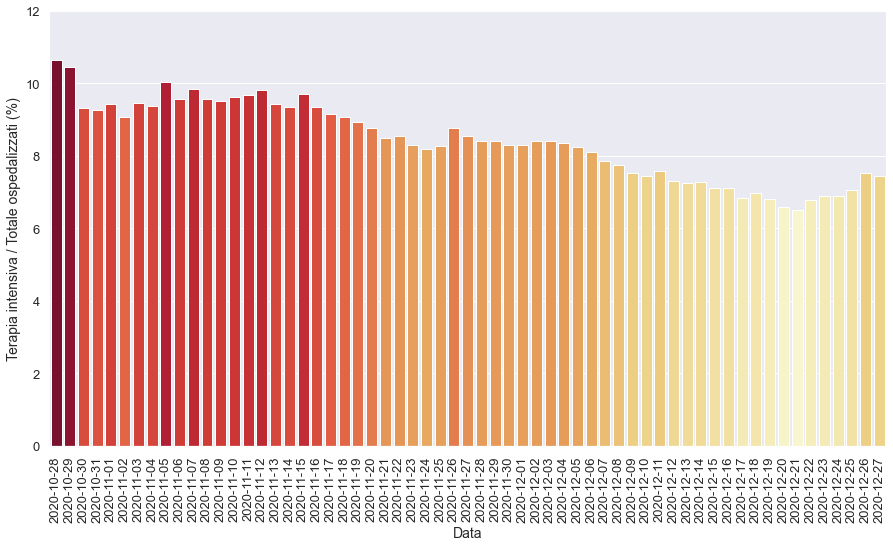

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

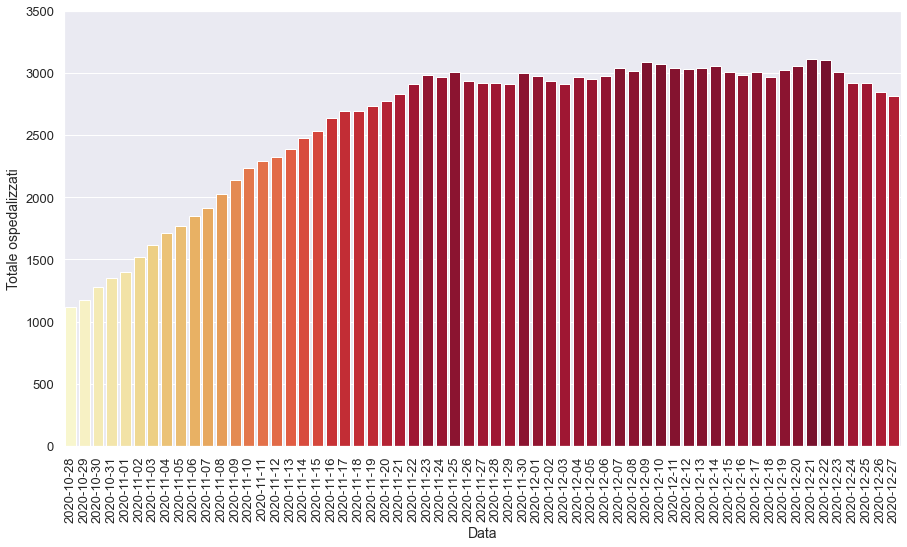

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

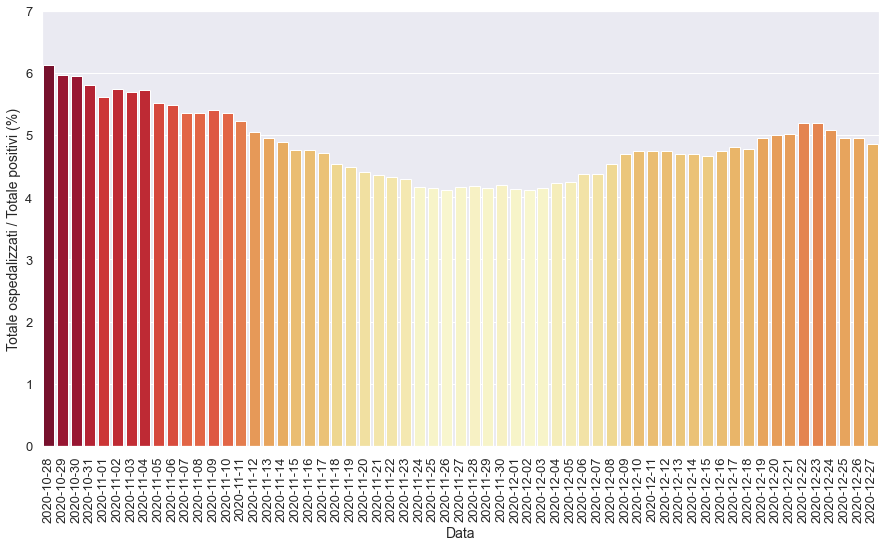

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

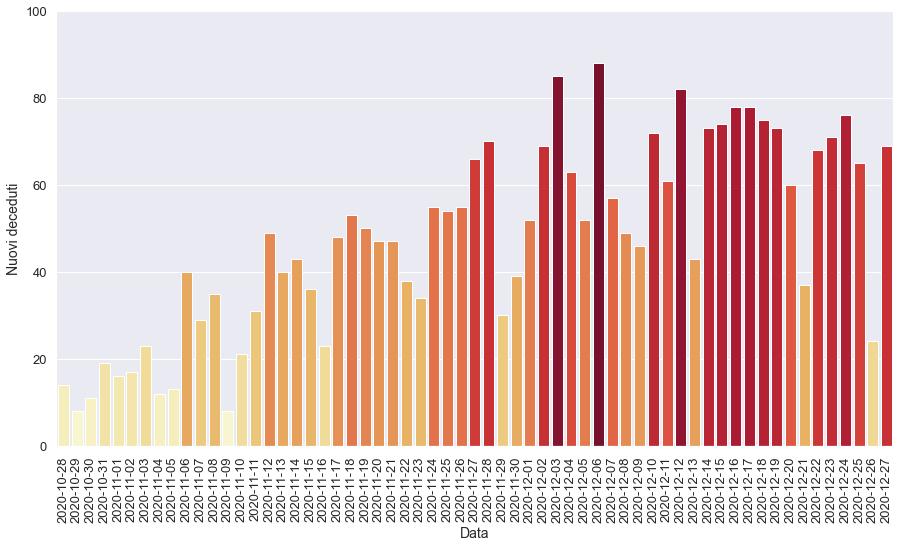

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

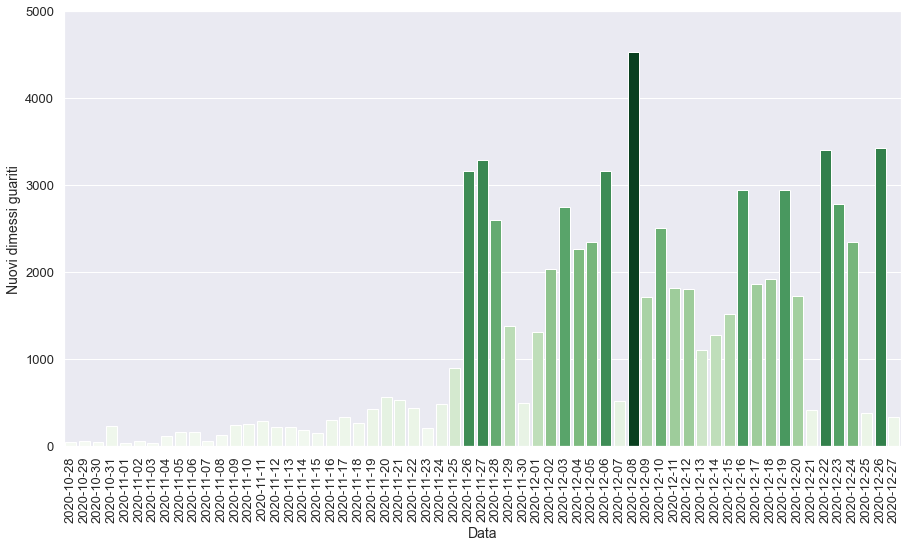

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,-1.66
1,2020-11-28T17:00:00,8,Emilia-Romagna,2673,245,2918,66865,69783,-506,2172,...,70.0,17241.0,6512.0,-501.0,8.40,4.18,12.60,33.35,-2.00,-0.72
2,2020-11-29T17:00:00,8,Emilia-Romagna,2668,245,2913,67316,70229,446,1850,...,30.0,13434.0,6157.0,451.0,8.41,4.15,13.77,30.05,0.00,0.64
3,2020-11-30T17:00:00,8,Emilia-Romagna,2755,249,3004,68730,71734,1505,2041,...,39.0,10992.0,5286.0,1414.0,8.29,4.19,18.57,38.61,1.63,2.14
4,2020-12-01T17:00:00,8,Emilia-Romagna,2729,247,2976,68866,71842,108,1471,...,52.0,16816.0,5346.0,136.0,8.30,4.14,8.75,27.52,-0.80,0.15
5,2020-12-02T17:00:00,8,Emilia-Romagna,2692,247,2939,68366,71305,-537,1569,...,69.0,19676.0,6319.0,-500.0,8.40,4.12,7.97,24.83,0.00,-0.75
6,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
7,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26
8,2020-12-05T17:00:00,8,Emilia-Romagna,2707,243,2950,66679,69629,-427,1964,...,52.0,18663.0,6140.0,-412.0,8.24,4.24,10.52,31.99,-2.02,-0.61
9,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

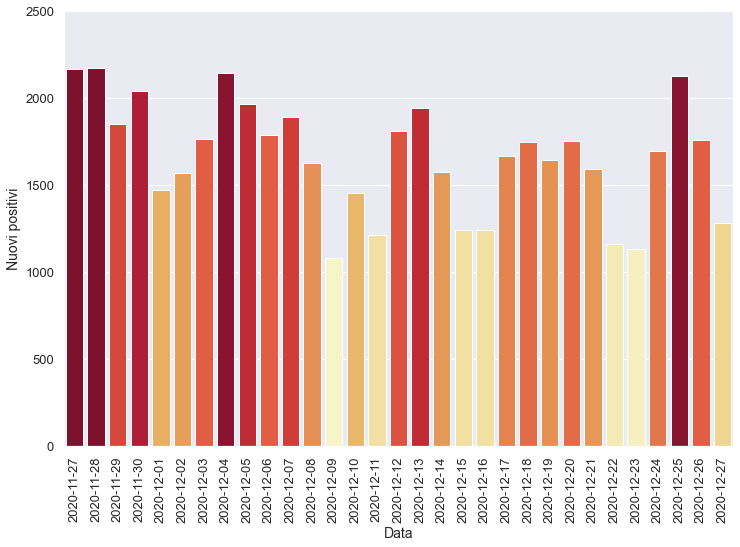

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

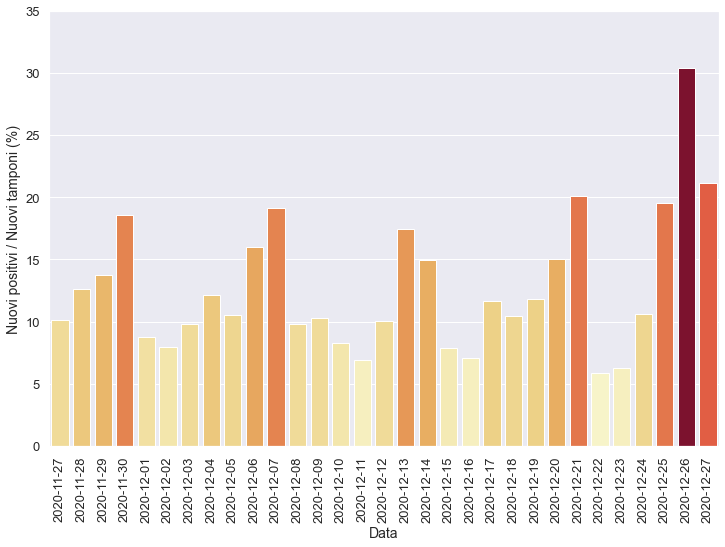

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

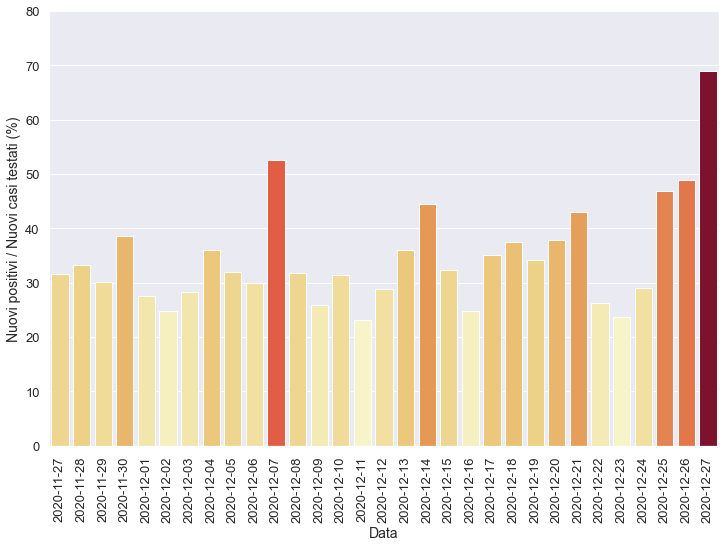

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

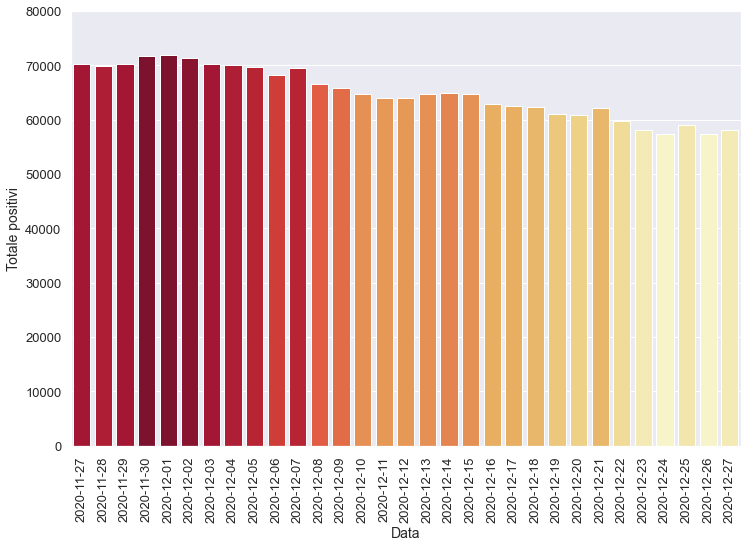

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

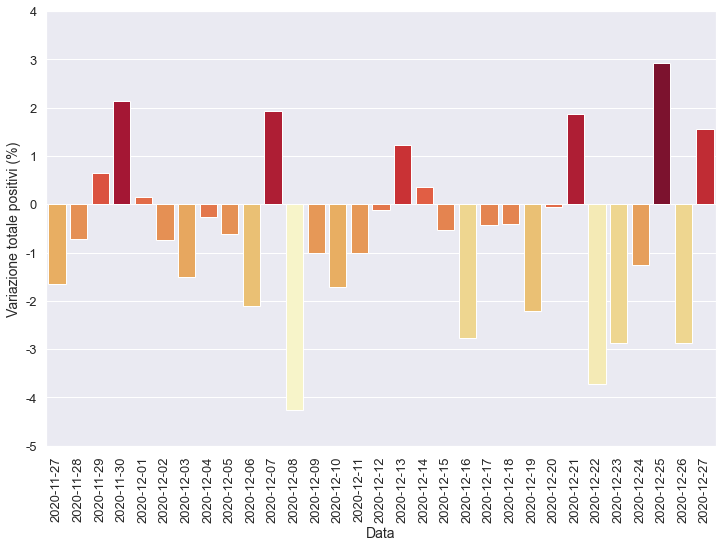

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

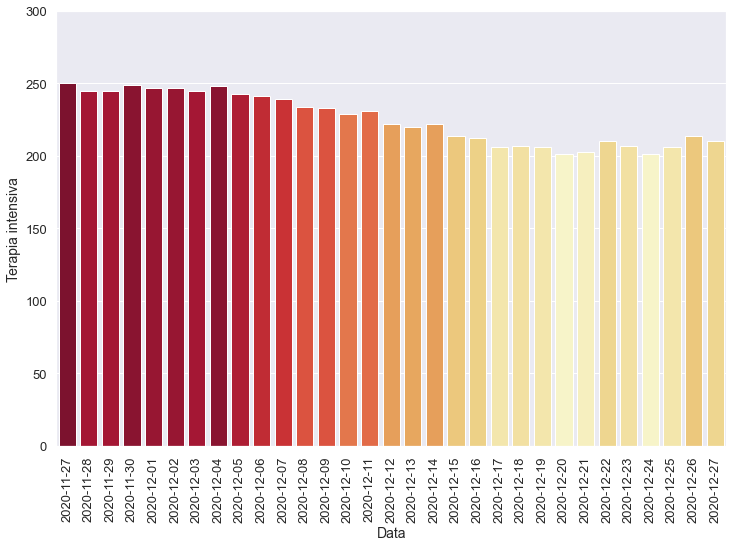

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

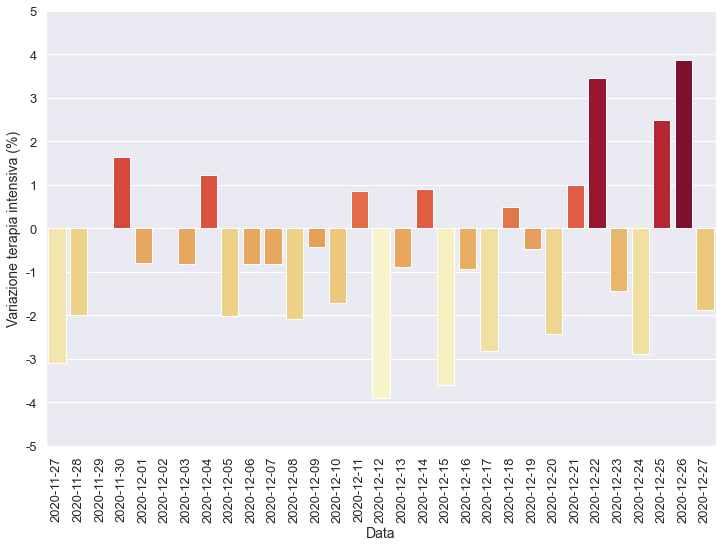

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

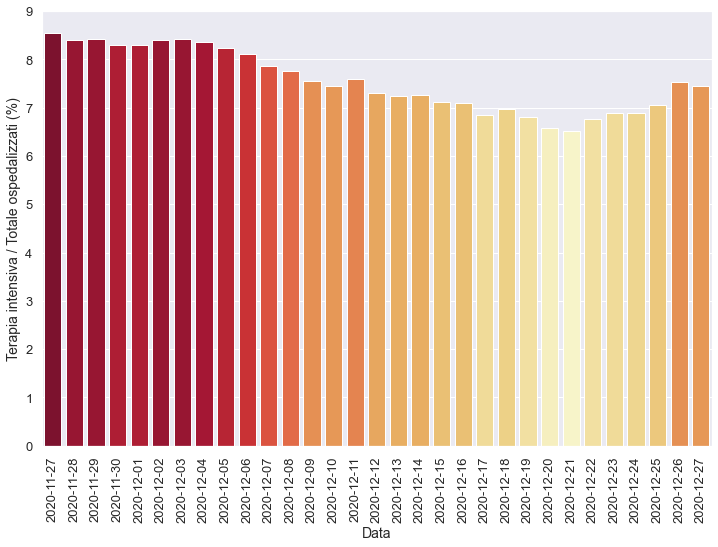

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

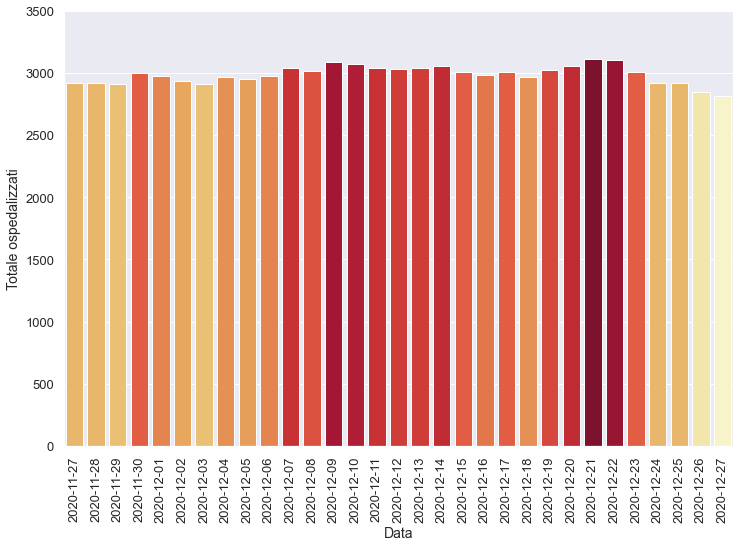

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

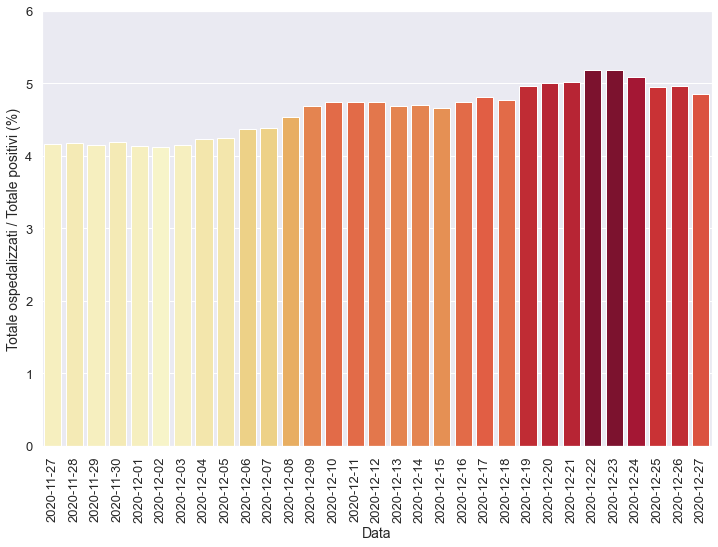

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

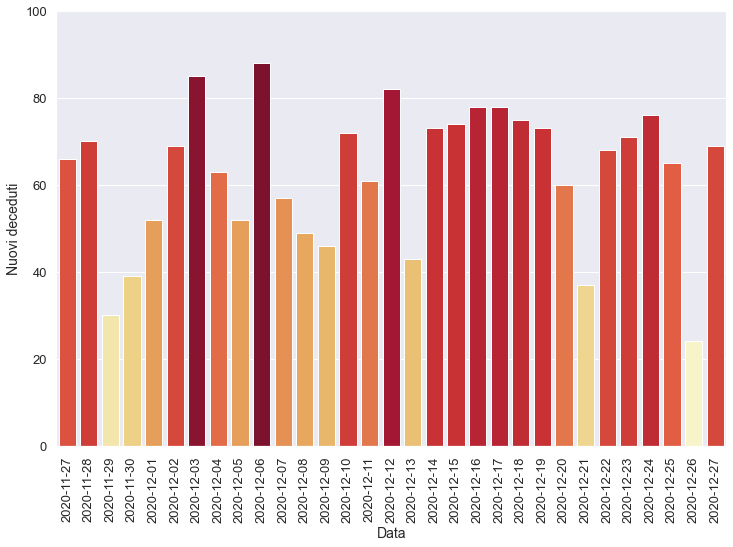

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

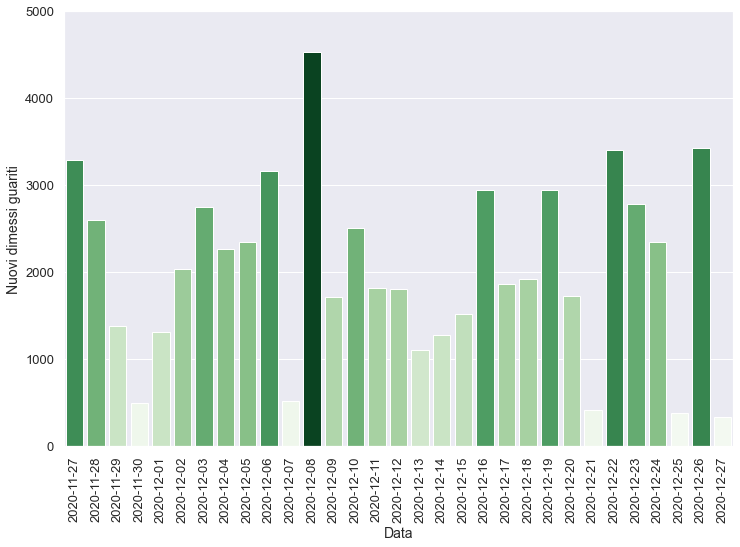

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-20T17:00:00,8,Emilia-Romagna,2852,201,3053,57863,60916,-33,1751,...,60.0,11661.0,4620.0,-61.0,6.58,5.01,15.02,37.90,-2.43,-0.05
1,2020-12-21T17:00:00,8,Emilia-Romagna,2914,203,3117,58937,62054,1138,1594,...,37.0,7938.0,3699.0,1074.0,6.51,5.02,20.08,43.09,1.00,1.87
2,2020-12-22T17:00:00,8,Emilia-Romagna,2891,210,3101,56645,59746,-2308,1162,...,68.0,19892.0,4435.0,-2292.0,6.77,5.19,5.84,26.20,3.45,-3.72
3,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
4,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25
5,2020-12-25T17:00:00,8,Emilia-Romagna,2711,206,2917,56063,58980,1681,2127,...,65.0,10861.0,4546.0,1683.0,7.06,4.95,19.58,46.79,2.49,2.93
6,2020-12-26T17:00:00,8,Emilia-Romagna,2630,214,2844,54443,57287,-1693,1756,...,24.0,5775.0,3587.0,-1620.0,7.52,4.96,30.41,48.95,3.88,-2.87
7,2020-12-27T17:00:00,8,Emilia-Romagna,2609,210,2819,55356,58175,888,1283,...,69.0,6066.0,1863.0,913.0,7.45,4.85,21.15,68.87,-1.87,1.55


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

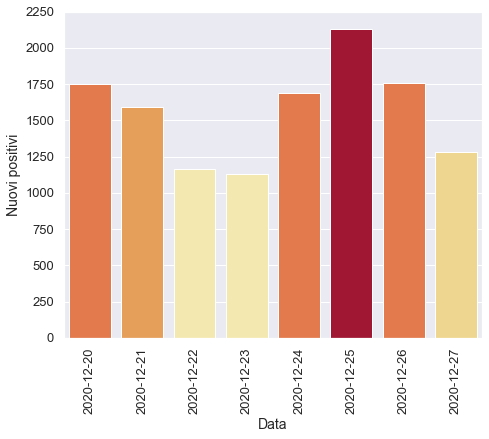

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

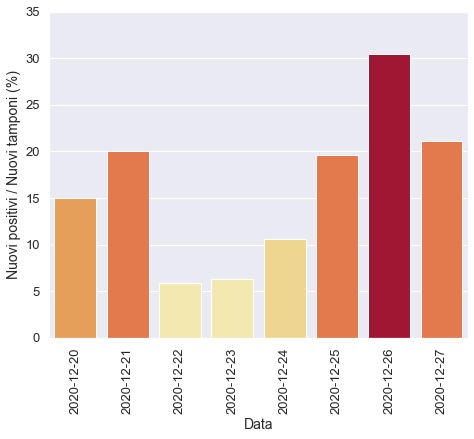

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

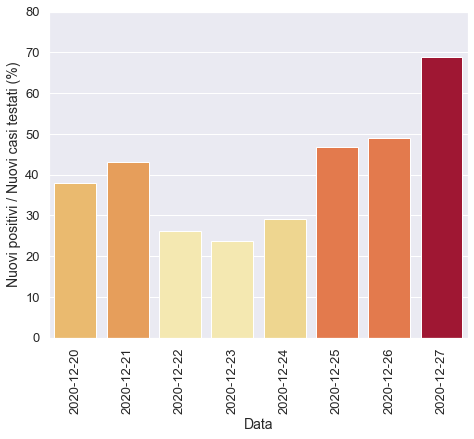

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

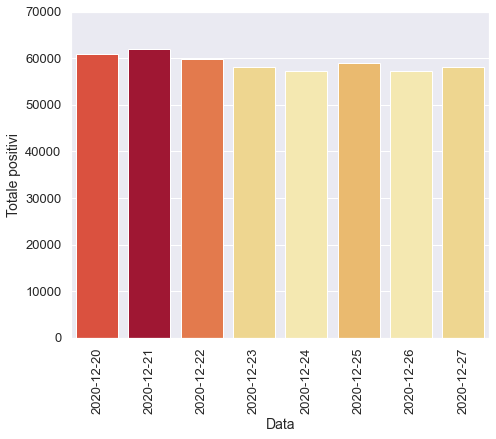

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

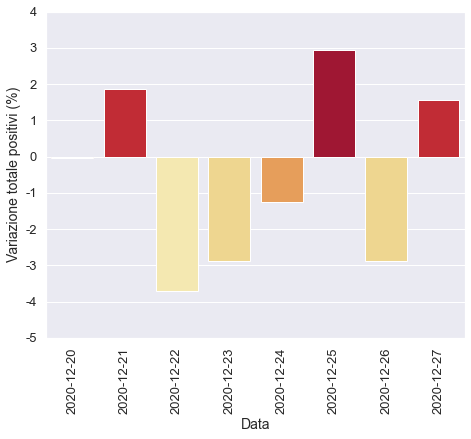

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

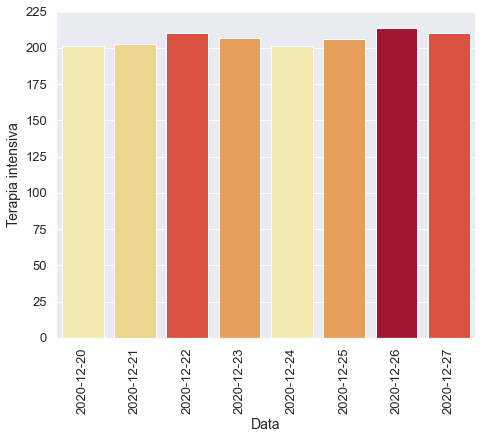

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

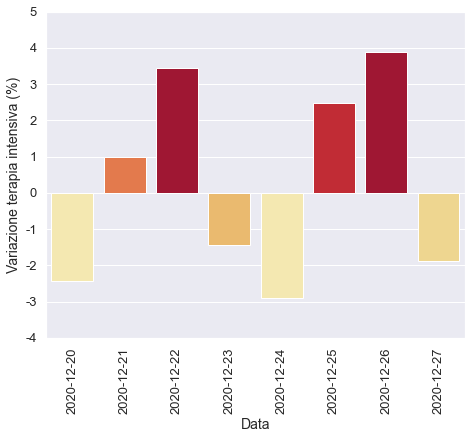

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

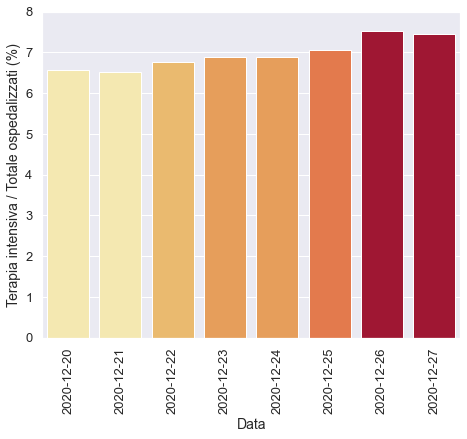

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

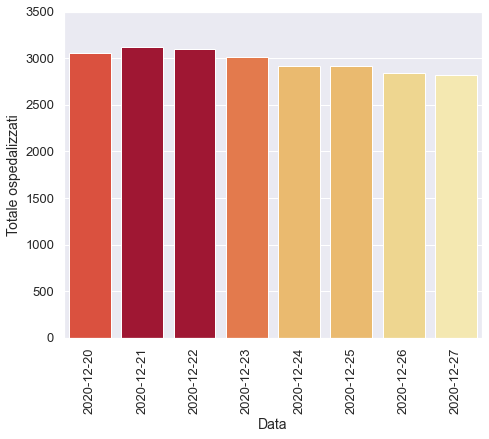

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

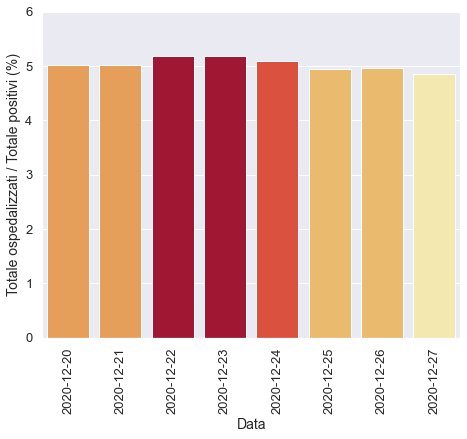

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

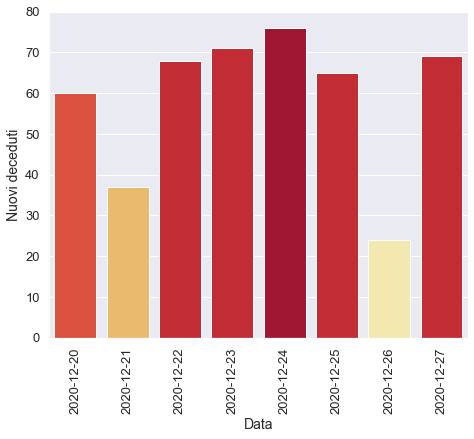

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

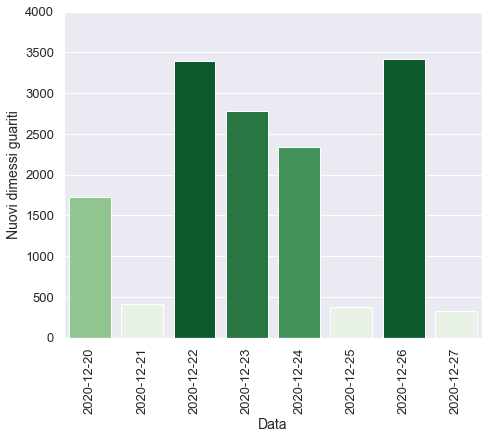

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)